In [46]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from past.builtins import xrange
from collections import Counter
import random
from tensorflow.keras.datasets import cifar10

import os
import numpy as np
import matplotlib.pyplot as plt

# ignore information messgaes from tensorflow, but we will receieve error messages
os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'

%matplotlib inline

In [47]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)


(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [48]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

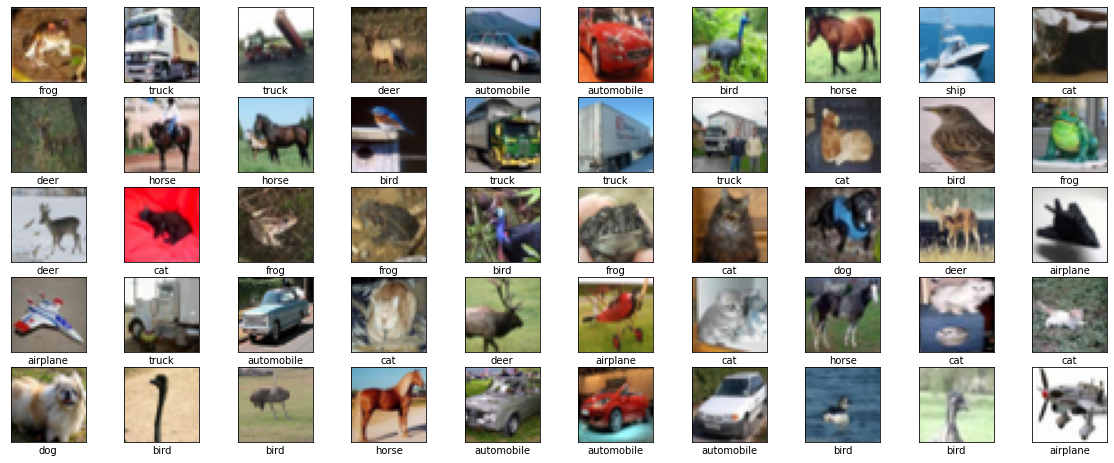

In [49]:

plt.figure(figsize=(20,8))
for i in range(50):
    plt.subplot(5, 10, i+1)
    plt.imshow(X_train[i])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(class_names[Y_train[i][0]])
    
plt.show()


In [50]:
num_training = 5000
mask = list(range(num_training))
X_train = X_train[mask]
Y_train = Y_train[mask]

num_test = 500
mask = list(range(num_test))
X_test = X_test[mask]
Y_test = Y_test[mask]

In [51]:
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
print(X_train.shape, X_test.shape)

(5000, 3072) (500, 3072)


In [52]:
class KNearestNeighbor(object):
    
 
    def __init__(self):
        pass
 
    def train(self, X, y):
    
        self.X_train = X
        self.y_train = y
    def compute_distances_no_loops(self, X):
      
        num_test = X.shape[0]
        num_train = self.X_train.shape[0]
        dists = np.zeros((num_test, num_train))
        dists = np.sqrt(-2 * np.dot(X, self.X_train.T) +
                        np.sum(np.square(self.X_train), axis=1) +
                        np.sum(np.square(X), axis=1)[:, np.newaxis])
        print(dists.shape)
        return dists   
    def predict_labels(self, dists, k=1):
        num_test = dists.shape[0]
        y_pred = np.zeros(num_test)
        for i in xrange(num_test):
            sortix = np.argsort(dists[i, :])
            closest_y = self.y_train[sortix[:min(k, len(sortix))]]
            y_pred[i] = Counter(closest_y[0]).most_common(1)[0][0]
        return y_pred    

In [53]:
def compute_distances_no_loops(self, X):
      
        num_test = X.shape[0]
        num_train = self.X_train.shape[0]
        dists = np.zeros((num_test, num_train))
        dists = np.sqrt(-2 * np.dot(X, self.X_train.T) +
                        np.sum(np.square(self.X_train), axis=1) +
                        np.sum(np.square(X), axis=1)[:, np.newaxis])
        print(dists.shape)
        return dists

In [54]:
num_folds = 5
k_choices = [1, 3, 5, 8, 10, 12, 15, 20, 50, 100]

X_train_folds = []
Y_train_folds = []

X_train_folds = np.array_split(X_train, num_folds)
Y_train_folds = np.array_split(Y_train, num_folds)

In [55]:
classifier = KNearestNeighbor()
classifier.train(X_train, Y_train)
accuracies =[]
k_to_accuracies = {}
for k in k_choices:
    k_to_accuracies[k] = []
    
for idx in range(num_folds): 
    X_train_set = np.concatenate((*X_train_folds[:idx], *X_train_folds[idx+1:]), axis=0)
    Y_train_set = np.concatenate((*Y_train_folds[:idx], *Y_train_folds[idx+1:]), axis=0)
    X_validation_set = X_train_folds[idx]
    Y_validation_set = Y_train_folds[idx]   
    num_validation_set = X_validation_set.shape[0]
    dists_validate = classifier.compute_distances_no_loops(X_validation_set)
    for k in k_choices:
        Y_validation_pred = classifier.predict_labels(dists_validate, k=k)
        accuracy = (float(np.sum(np.equal(Y_validation_pred, Y_validation_set)))/num_validation_set)
        k_to_accuracies[k].append(accuracy)


for k in sorted(k_to_accuracies):
    for accuracy in k_to_accuracies[k]:
        print('k = %d, accuracy = %f' % (k, accuracy))


(1000, 5000)
(1000, 5000)
(1000, 5000)
(1000, 5000)
(1000, 5000)
k = 1, accuracy = 99.000000
k = 1, accuracy = 104.000000
k = 1, accuracy = 119.000000
k = 1, accuracy = 98.000000
k = 1, accuracy = 99.000000
k = 3, accuracy = 99.000000
k = 3, accuracy = 104.000000
k = 3, accuracy = 119.000000
k = 3, accuracy = 98.000000
k = 3, accuracy = 99.000000
k = 5, accuracy = 99.000000
k = 5, accuracy = 104.000000
k = 5, accuracy = 119.000000
k = 5, accuracy = 98.000000
k = 5, accuracy = 99.000000
k = 8, accuracy = 99.000000
k = 8, accuracy = 104.000000
k = 8, accuracy = 119.000000
k = 8, accuracy = 98.000000
k = 8, accuracy = 99.000000
k = 10, accuracy = 99.000000
k = 10, accuracy = 104.000000
k = 10, accuracy = 119.000000
k = 10, accuracy = 98.000000
k = 10, accuracy = 99.000000
k = 12, accuracy = 99.000000
k = 12, accuracy = 104.000000
k = 12, accuracy = 119.000000
k = 12, accuracy = 98.000000
k = 12, accuracy = 99.000000
k = 15, accuracy = 99.000000
k = 15, accuracy = 104.000000
k = 15, accura

k = 1, average accuracy = 103.800000
k = 3, average accuracy = 103.800000
k = 5, average accuracy = 103.800000
k = 8, average accuracy = 103.800000
k = 10, average accuracy = 103.800000
k = 12, average accuracy = 103.800000
k = 15, average accuracy = 103.800000
k = 20, average accuracy = 103.800000
k = 50, average accuracy = 103.800000
k = 100, average accuracy = 103.800000


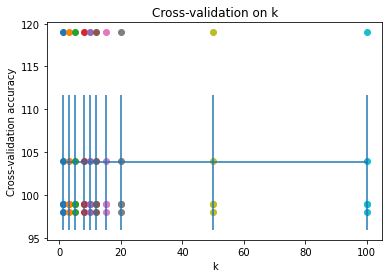

In [56]:
for k in k_choices:
    accuracies = k_to_accuracies[k]
    print('k = %d, average accuracy = %f' % (k, np.average(accuracies)))
    plt.scatter([k] * len(accuracies), accuracies)

accuracies_mean = np.array([np.mean(v) for k,v in sorted(k_to_accuracies.items())])
accuracies_std = np.array([np.std(v) for k,v in sorted(k_to_accuracies.items())])
plt.errorbar(k_choices, accuracies_mean, yerr=accuracies_std)
plt.title('Cross-validation on k')
plt.xlabel('k')
plt.ylabel('Cross-validation accuracy')
plt.show()